# Coursework 1 : Introduction to Machine Learning - Decision Trees

This project was carried out in a school context by four classmates. 

* **Pierre-Antoine ARSAGUET** : [pea22@ic.ac.uk](mailto:pea22@ic.ac.uk?subject=[Coursework%20n°1]%20:%20)
* **Louis BERTHIER** : [ldb22@ic.ac.uk](mailto:ldb22@ic.ac.uk?subject=[Coursework%20n°1]%20:%20)
* **Nikita DMITRIEFF** : [nnd19@ic.ac.uk](mailto:nnd19@ic.ac.uk?subject=[Coursework%20n°1]%20:%20)
* **Ryan EL KHOURY** : [re122@ic.ac.uk](mailto:re122@ic.ac.uk?subject=[Coursework%20n°1]%20:%20)


<div id="Room Picture " align = "center">
   <b>The subject consists in implementing a Decision Trees algorithm from scratch to indicate and classify the position of a user in one of the four rooms according to the power of his wifi.</b>
   <br></br>
  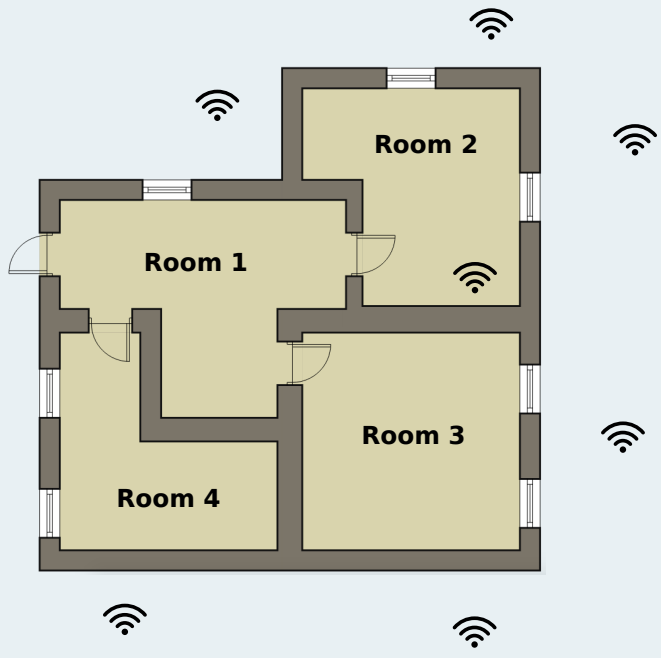
</div>

## **1. Import Libraries** _(Commented)_

In [138]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.pyplot import figure
import pandas as pd
import tqdm
plt.rcParams['figure.figsize'] = [12, 6]

## **2. Loading data (First visualization: exploration of our data)** _(Commented)_

### **2.1 Clean dataset**

#### **Visualizing our dataset as N-D Array** 

In [139]:
clean_dataset = np.loadtxt('wifi_db/clean_dataset.txt')

In [140]:
clean_dataset

array([[-64., -56., -61., ..., -82., -81.,   1.],
       [-68., -57., -61., ..., -85., -85.,   1.],
       [-63., -60., -60., ..., -85., -84.,   1.],
       ...,
       [-62., -59., -46., ..., -87., -88.,   4.],
       [-62., -58., -52., ..., -90., -85.,   4.],
       [-59., -50., -45., ..., -88., -87.,   4.]])

#### **Converting our ndarray into a dataframe**

In [141]:
clean_df = pd.DataFrame({'Emitter 1': clean_dataset[:, 0], 'Emitter 2': clean_dataset[:, 1], 'Emitter 3': clean_dataset[:, 2], 'Emitter 4': clean_dataset[:, 3], 'Emitter 5': clean_dataset[:, 4], 'Emitter 6': clean_dataset[:, 5], 'Emitter 7': clean_dataset[:, 6], 'Room Number': clean_dataset[:, 7]})

In [142]:
clean_df.head()

,Emitter 1,Emitter 2,Emitter 3,Emitter 4,Emitter 5,Emitter 6,Emitter 7,Room Number
0,-64.0,-56.0,-61.0,-66.0,-71.0,-82.0,-81.0,1.0
1,-68.0,-57.0,-61.0,-65.0,-71.0,-85.0,-85.0,1.0
2,-63.0,-60.0,-60.0,-67.0,-76.0,-85.0,-84.0,1.0
3,-61.0,-60.0,-68.0,-62.0,-77.0,-90.0,-80.0,1.0
4,-63.0,-65.0,-60.0,-63.0,-77.0,-81.0,-87.0,1.0


In [143]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Emitter 1    2000 non-null   float64
 1   Emitter 2    2000 non-null   float64
 2   Emitter 3    2000 non-null   float64
 3   Emitter 4    2000 non-null   float64
 4   Emitter 5    2000 non-null   float64
 5   Emitter 6    2000 non-null   float64
 6   Emitter 7    2000 non-null   float64
 7   Room Number  2000 non-null   float64
dtypes: float64(8)
memory usage: 125.1 KB


#### **Changing the type of Room number which stands for a category and not a continuous value**

In [144]:
clean_df['Room Number'] = clean_df['Room Number'] .astype(str)
clean_df.dtypes

Emitter 1      float64
Emitter 2      float64
Emitter 3      float64
Emitter 4      float64
Emitter 5      float64
Emitter 6      float64
Emitter 7      float64
Room Number     object
dtype: object

#### **Understanding and visualization of our data**

In [145]:
clean_df.describe()

,Emitter 1,Emitter 2,Emitter 3,Emitter 4,Emitter 5,Emitter 6,Emitter 7
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000


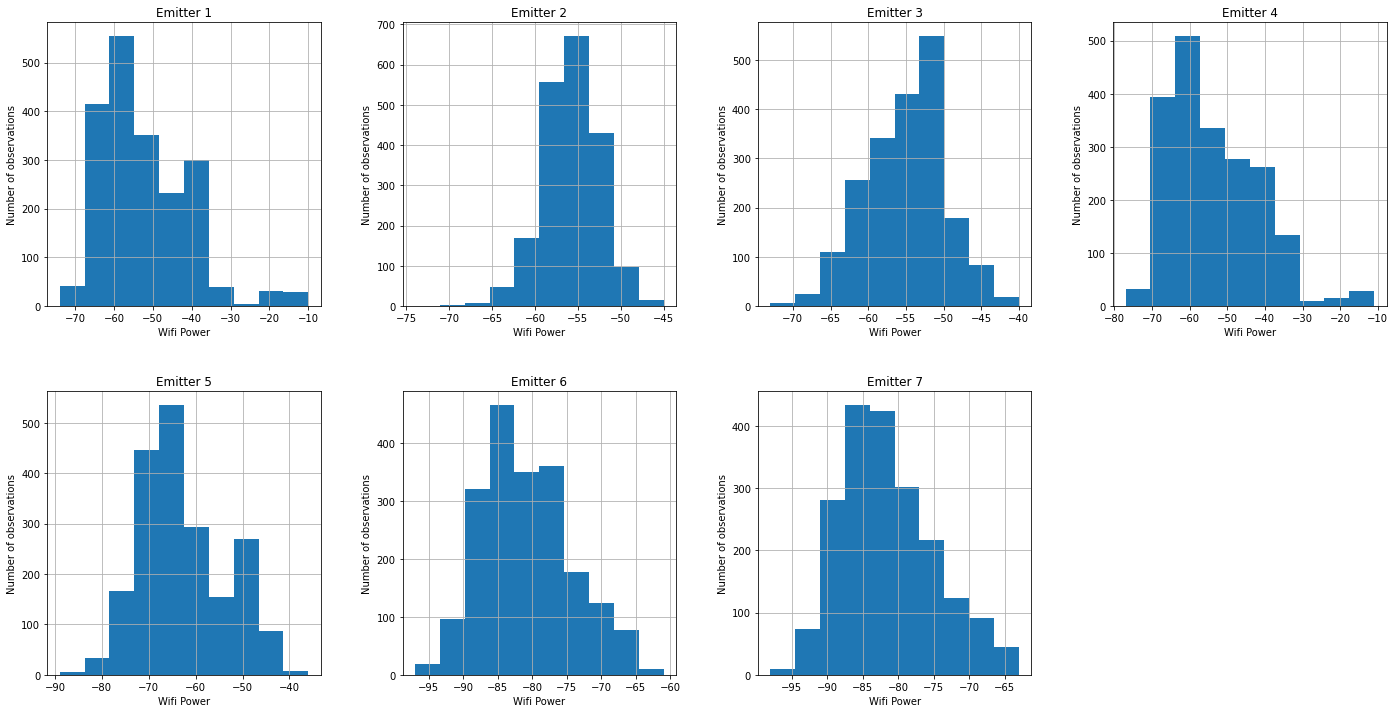

In [146]:
plot = clean_df.hist(layout=(2,4), figsize=(24,12))
for ax in plot.flatten():
    ax.set_xlabel("Wifi Power")
    ax.set_ylabel("Number of observations")
plt.show()

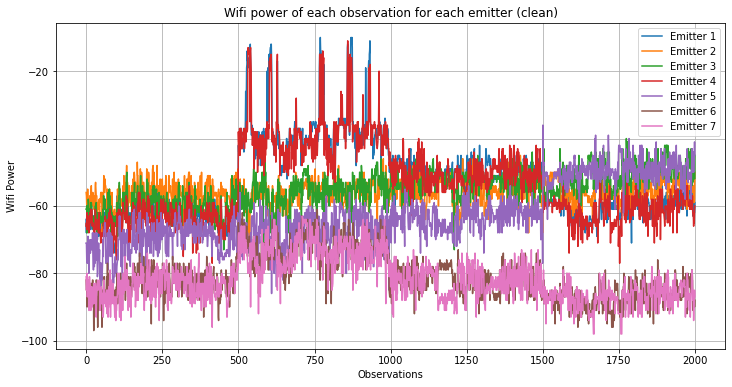

In [147]:
clean_df.plot(
    title = 'Wifi power of each observation for each emitter (clean)',
    grid = True,
    xlabel = 'Observations',
    ylabel = 'Wifi Power',
)
plt.legend(loc='best')

In [148]:
clean_df['Room Number'].value_counts()

2.0    500
1.0    500
4.0    500
3.0    500
Name: Room Number, dtype: int64

#### **Our datasat has 4 catgories/classes and it is totally balanced with 500 examples for each category**

### **2.2 Noisy dataset**

In [149]:
noisy_dataset = np.loadtxt('wifi_db/noisy_dataset.txt')
noisy_df = pd.DataFrame({'Emitter 1': noisy_dataset[:, 0], 'Emitter 2': noisy_dataset[:, 1], 'Emitter 3': noisy_dataset[:, 2], 'Emitter 4': noisy_dataset[:, 3], 'Emitter 5': noisy_dataset[:, 4], 'Emitter 6': noisy_dataset[:, 5], 'Emitter 7': noisy_dataset[:, 6], 'Room Number': noisy_dataset[:, 7]})
noisy_df['Room Number'] = noisy_df['Room Number'] .astype(str)
noisy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Emitter 1    2000 non-null   float64
 1   Emitter 2    2000 non-null   float64
 2   Emitter 3    2000 non-null   float64
 3   Emitter 4    2000 non-null   float64
 4   Emitter 5    2000 non-null   float64
 5   Emitter 6    2000 non-null   float64
 6   Emitter 7    2000 non-null   float64
 7   Room Number  2000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 125.1+ KB


In [150]:
noisy_df.describe()

,Emitter 1,Emitter 2,Emitter 3,Emitter 4,Emitter 5,Emitter 6,Emitter 7
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000


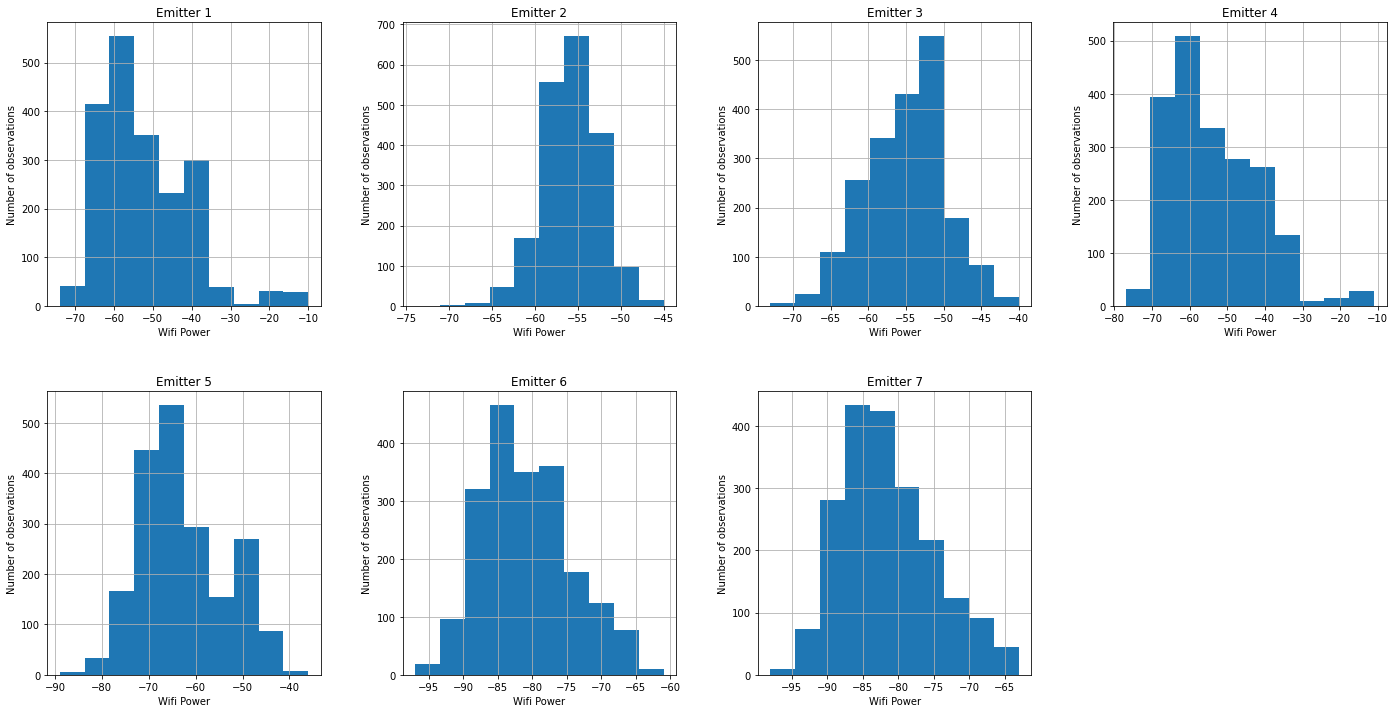

In [151]:
plot = noisy_df.hist(layout=(2,4), figsize=(24,12))
for ax in plot.flatten():
    ax.set_xlabel("Wifi Power")
    ax.set_ylabel("Number of observations")
plt.show()

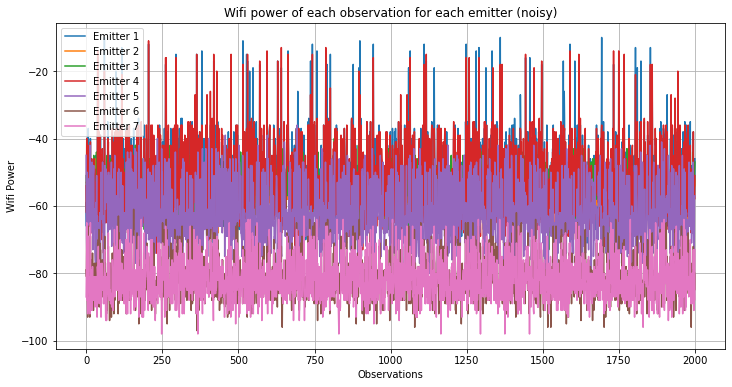

In [152]:
noisy_df.plot(
    title = 'Wifi power of each observation for each emitter (noisy)',
    grid = True,
    xlabel = 'Observations',
    ylabel = 'Wifi Power',
)
plt.legend(loc='best')

In [153]:
noisy_df['Room Number'].value_counts()

3.0    515
4.0    498
2.0    497
1.0    490
Name: Room Number, dtype: int64

#### **Our datasat has 4 catgories/classes and it is imbalanced : not each categoryhas 500 examples. However, the difference is really slight since the maximum difference between 500 examples and current values is 15 observations. This is about 3% of the elements of a totally balanced dataset.** (15/500 = 3%)

## **3. Creating, interpreting and visualizing Decision Trees**

### **3.1 Node Class** _(NOT COMMENTED)_

In [154]:
class Node():
    """ Creates each node in the tree

    Args:
        depth (int): depth of the node
        tree (Tree instance): Tree object the node is added to
        feat (int): feature on which the node is splitting the dataset
        thresh (float): threshold for splitting the dataset along the desired feature
        left_node (Node instance): child node corresponding to inputs lower than the threshold
        right_node (Node instance): child node corresponding to inputs greater than the threshold
        value (int or None): value of the node if the node is a terminal one (leaf)
        y (np.ndarray): labels of the dataset it is splitting, used when assigning a value to a previously
            non-terminal branch which becomes one during pruning
    """ 
    def __init__(self, depth, tree, feat=None, thresh=None, left_node=None, right_node=None, value=None, y=None):
        
        self.feat = feat
        self.thresh = thresh
        self.left_node = left_node
        self.right_node = right_node
        self.value = value
        self.depth = depth
        self.data = y
        
        tree.recall.append(self)
        
        return

### **3.2 Tree Class** _(NOT COMMENTED)_

In [155]:
class Tree():
    """ Creates an instance Tree

    Args:
        data (np.ndarray): dataset constituting the basis of the tree (not used yet)
        max_depth (int or None): in case the tree is required to not exceed a certain depth
    """ 
    def __init__(self, data, max_depth=None):
        
        self.depth = 0
        self.recall = []
        self.data = data
        self.tree = {}
        self.classes = set(list(data[:][-1]))
        self.id = []
        self.max_depth = max_depth
        
        return
    
    def decision_tree_learning(self, training_dataset, depth=1):
        """ Creates the decision tree model for the Tree instance

        Args:
            training_data (np.ndarray): dataset constituting the basis of the tree
            depth (int): depth of our tree. This can be more than 1 as we are using a recursive function,
                i.e. building trees within trees
                
        Returns:
            Node Instance: Node either non-terminal for the first return or terminal for the second
        """ 
        y = list(training_dataset[:, -1])
        
        depth_condition = True
        
        if self.max_depth is not None:
            depth_condition = depth < self.max_depth
        
        # If the previous condition is set to 'True' it means we have not yet exceeded the max depth
        # or that there is no max_depth for this tree
        # Follow the standard construction of our tree by splitting our node in two using a recursive function
        # We also have to verify that we do not have an empty dataset
        
        if depth_condition and training_dataset.shape[0] > 2:
            
            if len(np.unique(training_dataset[:, -1])) > 1:
            
                feature, threshold, dataset = self.find_split(training_dataset)  
                left_branch = self.decision_tree_learning(dataset["left"], depth+1) # Changed to np.max, no real change in the results
                right_branch = self.decision_tree_learning(dataset["right"], depth+1)
                
                # The if statements were not all passed, it means this node object is not a terminal node
                # It thus takes the value None as a way to signify this
                return Node(depth, self, feature, threshold, left_branch, right_branch, value=None, y=y)
        
        # Updtates the depth of the node
        if depth > self.depth:
            self.depth = depth
        
        # All the if statements have been passed, it means this node object is a terminal node
        # It thus takes the value value to signify this
        value = max(y,key=y.count)
        return Node(depth, self, value=value, y=y)

    def find_split(self, data):
        """ Finds the best split for given the data

        Args:
            data (np.ndarray): dataset constituting the basis of our split
                
        Returns:
            best_feat (int): best feature for the split
            best_thresh (float): best threshold for the split
            data (dict): dictionnary with two keys 'left' and 'right' with values np.ndarray
        """ 
        n_features = len(data[0]) - 1
        
        best_feat = 0
        best_gain = -float("inf")
        best_thresh = 0

        for feature in range(n_features):
            
            best_feat_thresh = None
            best_feat_gain = -float("inf")
            
            # Calculates the best threshold thanks to the gain function
            for xi in data[:, feature]:
            
                right = data[data[:, feature]>xi]
                left = data[data[:, feature]<=xi]
                
                lengths = [data[:,-1].shape[0], left[:,-1].shape[0], right[:,-1].shape[0]]
                
                if min(lengths) > 0:

                    feat_gain = gain(data[:,-1], left[:,-1], right[:,-1], self.classes)

                    if feat_gain > best_feat_gain:
                        best_feat_gain = feat_gain
                        best_feat_thresh = xi
     
            if best_feat_gain > best_gain:
                best_feat = feature
                best_gain = best_feat_gain
                best_thresh = best_feat_thresh


        right = data[data[:,best_feat] > best_thresh]
        left = data[data[:,best_feat] <= best_thresh]
        
        data = {}
        
        data["right"] = right
        data["left"] = left

        return best_feat, best_thresh, data
    
    def prediction(self, xs_to_predict):
        """ Predicts outputs for given inputs

        Args:
            xs_to_predict (np.ndarray): dataset we want a prediction for
                
        Returns:
            y_pred (np.ndarray): predicted outputs for the given dataset
        """ 
        y_pred = []
        for xpred in xs_to_predict:
            condition = True
            
            # Start at the root node given by the last node created
            root_node = self.recall[-1]
            
            # Go down the tree to the terminal node for each input in our dataset
            while condition:
                root_node, condition, value = self.follow_tree(xpred, root_node)
                    
            y_pred.append(value)
            
        return y_pred
        
    def follow_tree(self, x, node):
        """ Given an input and a node, returns the next node to follow or the value predicted
                in case of a terminal node.

        Args:
            x (np.ndarray): input we want to predict
                
        Returns:
            node (Node instance) : next node to follow (either left one or right one)
            bool : determines if the node given is a terminal one. If so, the 'while' loop should be
                exited in the prediction function where the follow_tree function is called
            node.value (None or int) : value of the node
        """ 
        if node.value is not None:
            return None, False, node.value
        
        elif x[node.feat] > node.thresh:
            return node.right_node, True, None
        
        return node.left_node, True, None
        
        
    def fit_train(self, x, y):
        """ Trains the Tree

        Args:
            x (np.ndarray): input dataset we want the tree trained on
            y (np.ndarray): output dataset we want the tree trained on
        """ 
        assert x.shape[0] == y.shape[0]
        assert y.shape[1] == 1
        
        data = np.concatenate([x, y], axis=1)
        
        self.decision_tree_learning(data)
        


### **3.3 Metrics' functions**

#### **3.3.1 Confusion Matrix** _(Commented)_

In [156]:
def confusion_matrix(y_gold, y_prediction, class_labels=None):
    """ Compute the confusion matrix.
        
    Args:
        y_gold (np.ndarray): the correct ground truth/gold standard labels
        y_prediction (np.ndarray): the predicted labels
        class_labels (np.ndarray): a list of unique class labels. 
                               Defaults to the union of y_gold and y_prediction.

    Returns:
        np.array : shape (C, C), where C is the number of classes. 
                   Rows are ground truth per class, columns are predictions
    """

    # if no class_labels are given, we obtain the set of unique class labels from
    # the union of the ground truth annotation and the prediction
    if not class_labels:
        
        class_labels = np.unique(np.concatenate((y_gold, y_prediction)))
    
    y_gold = y_gold.astype(int)
    y_prediction = y_prediction.astype(int)
    
    # Initialization of our confusion matrix
    confusion = np.zeros((len(class_labels), len(class_labels)), dtype=np.int)
    
    # Looping over GT labels
    for i, observation in enumerate(y_gold) :
        
        # Re-indexing for accessing element within our confusion matrix
        obs = observation[0]-1
        y_pred = y_prediction[i][0]-1
        
        # If we have a prediction corresponding to current observation
        if obs == y_pred:
            
            confusion[obs][obs] += 1
            
        # If our prediction is wrong
        else :
            
            confusion[obs][y_pred] += 1

    return confusion

#### **3.3.2 Accuracy from Confusion Matrix** _(Commented)_

In [157]:
def accuracy_from_confusion(confusion):
    """ Compute the accuracy given the confusion matrix

    Args:
        confusion (np.ndarray): shape (C, C), where C is the number of classes. 
                    Rows are ground truth per class, columns are predictions

    Returns:
        float : the accuracy ==> (TP + TN) / (TP + TN + FP + FN)
    """   
    
    # Condition to avoid dividing by 0
    if np.sum(confusion) > 0:
        
        return np.sum(np.diag(confusion)) / np.sum(confusion) 
    
    else:
        
        return 0.

#### **3.3.3 Per-class Precision (and macro-averaged Precision) from Confusion Matrix** _(Commented)_

In [158]:
def class_precision_from_confusion(y_gold, y_prediction):
    """ Compute the per-class precision and the macro-averaged precision

    Args:
        y_gold (np.ndarray): the correct ground truth/gold standard labels
        y_prediction (np.ndarray): the predicted labels
        
    Returns:
        tuple: returns a tuple (precision, macro_precision) where
            - precision is a np.ndarray of shape (C,), where each element is the 
                precision for class c ==> TP / (TP + FP)
            - macro-precision is macro-averaged precision (a float)
    """
    
    # Constructing our confusion matrix
    confusion = confusion_matrix(y_gold, y_prediction)
    
    # Defining our categories
    categories = np.unique(y_gold)
    
    # Initialization of our ndarray which will contain the precision for each class
    p = np.zeros((len(confusion),))
    
    # Looping over our categories
    for category in range(len(categories)):
        
        # Condition to avoid dividing by 0
        if np.sum(confusion[:, category]) > 0:
            
            p[category] = confusion[category,category] / np.sum(confusion[:,category]) # Compute the precision for class

    # Compute the macro-averaged precision
    macro_p = 0.
    
    # Condition to avoid dividing by 0
    if len(p) > 0:
        
        macro_p = np.mean(p)
            
    return (p, macro_p)

#### **3.3.4 Per-class Recall (and macro-averaged Recall) from Confusion Matrix** _(Commented)_

In [159]:
def class_recall_from_confusion(y_gold, y_prediction):
    """ Compute the recall score per class and the macro-averaged recall given the ground truth and predictions
        
    Also return the macro-averaged recall across classes.
        
    Args:
        y_gold (np.ndarray): the correct ground truth/gold standard labels
        y_prediction (np.ndarray): the predicted labels

    Returns:
        tuple: returns a tuple (recalls, macro_recall) where
            - recalls is a np.ndarray of shape (C,), where each element is the 
                recall for class c ==> TP /(TP + FN)
            - macro-recall is macro-averaged recall (a float) 
    """
    
    # Constructing our confusion matrix
    confusion = confusion_matrix(y_gold, y_prediction)
    
    # Defining our categories
    categories = np.unique(y_gold)
    
    # Initialization of our ndarray which will contain the recall for each class
    r = np.zeros((len(confusion),))
    
    # Looping over our categories
    for category in range(len(categories)):
        
        # Condition to avoid dividing by 0
        if np.sum(confusion[:, category]) > 0:
            
            r[category] = confusion[category,category] / np.sum(confusion[category,:]) # Compute the recall per class
    
    # Compute the macro-averaged recall
    macro_r = 0.
    
    # Condition to avoid dividing by 0
    if len(r) > 0:
        
        macro_r = np.mean(r)

    return (r, macro_r)

#### **3.3.5 Per-class F1-Score (and macro-averaged F1-Score) from Recall and Precision** _(Commented)_

In [160]:
def f1_score(y_gold, y_prediction):
    """ Compute the F1-score per class and the macro-average f1-score given the ground truth and predictions
        
    Also return the macro-averaged F1-score across classes.
        
    Args:
        y_gold (np.ndarray): the correct ground truth/gold standard labels
        y_prediction (np.ndarray): the predicted labels

    Returns:
        tuple: returns a tuple (f1s, macro_f1) where
            - f1s is a np.ndarray of shape (C,), where each element is the 
              f1-score for class c ==> (2 * p * r) / (p + r)
            - macro-f1 is macro-averaged f1-score (a float) 
    """
    
    # Recovering our precisions and recalls values
    (precisions, macro_p) = class_precision_from_confusion(y_gold, y_prediction)
    (recalls, macro_r) = class_recall_from_confusion(y_gold, y_prediction)

    # Just to make sure they are of the same length
    assert len(precisions) == len(recalls)
    
    # Initialization of our ndarray which will contain the recall for each class
    f = np.zeros((len(precisions), ))
    
    # Looping over our categories
    for category in range(len(precisions)):
        
        # Condition to avoid dividing by 0
        if (precisions[category] > 0 or recalls[category] > 0):
            
            f[category] = (2*precisions[category]*recalls[category])/(precisions[category]+recalls[category]) # Compute the f1-score per class


    # Compute the macro-averaged F1-score
    macro_f = 0.
    
    # Condition to avoid dividing by 0
    if len(f) > 0:
        
        macro_f = np.mean(f)
        
    return (f, macro_f)

### **3.4 Useful Functions**

#### **3.4.1 Load our dataset** _(Commented)_

In [161]:
def read_dataset(filepath):
    """ Read in the dataset from the specified filepath

    Args:
        filepath (str): The filepath to the dataset file

    Returns:
        tuple: returns a tuple of (dataset, x, y, classes), each being a numpy array. 
               - dataset is numpy array with shape (N, L)
                   where N is the number of instances
                   L is the number of features + 1 (for the categories)
               - x is a numpy array with shape (N, K), 
                   where N is the number of instances
                   K is the number of features/attributes
               - y is a numpy array with shape (N, ), and should be integers from 0 to C-1
                   where C is the number of classes 
               - classes : a numpy array with shape (C, ), which contains the 
                   unique class labels corresponding to the integers in y
    """
       
    # Loading our dataset
    dataset = np.loadtxt(filepath)
    
    # Separating Y (class) and X (features)
    x = dataset[:,:-1]
    y = dataset[:,-1:]
    
    # Identifying all our categories
    classes = np.unique(y)

    return (dataset, x, y, classes)

#### **3.4.2 Functions about Entropy and IG** _(NOT COMMENTED)_

In [162]:
def Entropy(y, labels): 
    """ Calculate the entropy of a specific set, usually the whole dataset

    Args:
        y (numpy array):  shape (N, ), and should be integers from 0 to C-1 
                          where C is the number of classes 
        labels () : 

    Returns:
        float : the entropy
    """
    
    entropy = 0.
    
    N = y.shape[0]
    
    if N == 0:
        print("PROBLEM")
        print(y.shape)
        print(y)
    
    assert N != 0, f"N is the following: {N}"
    
    for label in labels:
        prob = np.count_nonzero(y == label)/N
        if prob == 0:
            continue
        entropy -= prob*np.log2(prob)
    
    return entropy



def remainder(y_left, y_right, labels):
    """ Calculate the entropy of the new subsets
    
    """
    
    N = y_left.shape[0] + y_right.shape[0]
    
    assert N != 0
    rem = (y_left.shape[0]/N)*Entropy(y_left, labels) + (y_right.shape[0]/N)*Entropy(y_right, labels)
    
    return rem

def gain(y_all, y_left, y_right, labels):
    """ Calculate the Information Gain
    
    """
    
    return Entropy(y_all, labels) - remainder(y_left, y_right, labels)

#### **3.4.3 Generate k-folds and shuffling all elements** _(Commented)_

In [163]:
def create_k_folds(x, n_folds, random_generator = default_rng()):
    """ Create n_folds of indices, all shuffled

    Args:
        x (numpy array): It has a shape (N, K) where N is the number of instances
                         and K is the number of features/attribute
        n_folds (int): Number of folds
        random_generator (np.random.Generator): A random generator
        
    Returns:
        list: all our shuffled indices folds, with shape (n_folds, number of instances)
    """
    
    
    # Initialization of our list which will contain several dataset (shuffled indices folds)
    folds = []
    
    # Looping over each fold
    for k in range (n_folds):
        
        # Generating a random permutation of indices from 0 to len(x)
        shuffled_indices = random_generator.permutation(len(x))
        
        # Adding the new dataset (shuffled) to our list defined above
        folds.append(shuffled_indices) 

    return folds

#### **3.4.4 Functions about dividing A dataset into train, (val), test sets** _(Commented)_

In [164]:
def split_train_test_dataset(x, train_proportion, random_generator=default_rng()):
    """ Split a specific fold into train and test sets

    Args:
        x (numpy array): It has a shape (N, K) where N is the number of instances
                         and K is the number of features/attribute
        train_proportion (float): Proportion of our dataset that will be used as a train set
        random_generator (np.random.Generator): A random generator
        
    Returns:
        tuple: returns a tuple of (train_indices, val_indices, test_indices), each being a numpy array. 
               - train_indices is numpy array with shape (K,)
                   where K = len(x) * train_proportion and is the number of instances in our train set
               - test_indices is a numpy array with shape (M,),
                   where M = len(x) * (1 - train_proportion) and is the number of instances in our test set
    """
    
    # Shuffling our dataset/fold a second time 
    shuffled_indices = random_generator.permutation(len(x))
     
    # Defining our train index
    train_index = round(len(x)*train_proportion)
    
    # Definingour train and test indices
    train_indices = shuffled_indices[:train_index]
    test_indices = shuffled_indices[train_index:]
    
    return (train_indices, test_indices)



def split_dataset(x, train_proportion, val_proportion, random_generator=default_rng()):
    """ Split a specific fold into train, val and test sets

    Args:
        x (numpy array): It has a shape (N, K) where N is the number of instances
                         and K is the number of features/attribute
        train_proportion (float): Proportion of our dataset that will be used as a train set
        val_proportion (float) : Proportion of our dataset that will be used as a validation set
        random_generator (np.random.Generator): A random generator
        
    Returns:
        tuple: returns a tuple of (train_indices, val_indices, test_indices), each being a numpy array. 
               - train_indices is numpy array with shape (K,)
                   where K = len(x) * train_proportion and is the number of instances in our train set
               - val_indices is a numpy array with shape (L,), 
                   where L = len(x) * val_proportion and is the number of instances in our validation set
               - test_indices is a numpy array with shape (M,),
                   where M = len(x) * (1 - train_proportion - val_proportion) and is the number of instances in our test set
    """
    
    # Shuffling our dataset/fold a second time 
    shuffled_indices = random_generator.permutation(len(x))
     
    # Defining our train, val and test index
    train_index = round(len(x)*train_proportion)
    val_index = round(len(x)*val_proportion)
    test_index = 1 - (train_index + val_index)
    
    # Definingour train, val and test indices
    train_indices = shuffled_indices[:train_index]
    val_indices = shuffled_indices[train_index:train_index+val_index]
    test_indices = shuffled_indices[train_index+val_index:]
    
    return (train_indices, val_indices, test_indices)

#### **3.4.5 Functions about dividing EACH fold into train, (val), test sets** _(Commented)_

In [165]:
def split_train_test_all_dataset(x, n_folds, train_proportion, random_generator=default_rng()):
    """ Split all our specific folds into train and test sets

    Args:
        x (numpy array): It has a shape (N, K) where N is the number of instances
                         and K is the number of features/attribute
        n_folds (int) : Number of folds
        train_proportion (float): Proportion of our dataset that will be used as a train set
        random_generator (np.random.Generator): A random generator
        
    Returns:
        list : with shape (P,Q) where P is n_folds and Q is [train_indices, test_indices]
    """

    # We create n_folds of len(x) elements each. They are all shuffled.
    folds = create_k_folds(x, n_folds, random_generator)
    
    # Initialization of the list which wil contains our n_folds separated into train and test sets
    divided_folds = []
    
    # Looping over each fold
    for k in range(n_folds):
        
        # Retrieving our train and test indices depending on the current fold and the proportions
        train_indices, test_indices = split_train_test_dataset(folds[k], train_proportion, random_generator=default_rng())
        
        # Adding our fold's indices into our list defined above
        divided_folds.append([train_indices, test_indices])
        
    return divided_folds



def split_all_dataset(x, n_folds, train_proportion, val_proportion, random_generator=default_rng()):
    """ Split all our specific folds into train, val and test sets

    Args:
        x (numpy array): It has a shape (N, K) where N is the number of instances
                         and K is the number of features/attribute
        n_folds (int) : Number of folds
        train_proportion (float): Proportion of our dataset that will be used as a train set
        val_proportion (float) : Proportion of our dataset that will be used as a validation set
        random_generator (np.random.Generator): A random generator
        
    Returns:
        list : with shape (P,Q) where P is n_folds and Q is [train_indices, val_indices, test_indices]
    """

    # We create n_folds of len(x) elements each. They are all shuffled.
    folds = create_k_folds(x, n_folds, random_generator)
    
    # Initialization of the list which wil contains our n_folds separated into train, val and test sets
    divided_folds = []
    
    # Looping over each fold
    for k in range(n_folds):
        
        # Retrieving our train, val and test indices depending on the current fold and the proportions
        train_indices, val_indices, test_indices = split_dataset(folds[k], train_proportion, val_proportion, random_generator=default_rng())
        
        # Adding our fold's indices into our list defined above
        divided_folds.append([train_indices, val_indices, test_indices])
        
    return divided_folds

#### **3.4.6 Functions about performing cross-validation** _(Commented)_

In [166]:
def cross_validation(dataset_filepath, train_proportion, val_proportion, n_folds,  n_inner_folds, rg, pruning_test=False, display_results=True):
    """ Perform a cross validation on our initial dataset

    Args:
        dataset_filepath (str): The filepath to the dataset file
        train_proportion (float): Proportion of our dataset that will be used as a train set (outer)
        val_proportion (float): Proportion of our dataset that will be used as a validation set (inner)
        n_folds (int): Number of folds (outer) for the test
        n_inner_folds (int) : Number of folds (inner) for the validation
        random_generator (np.random.Generator): A random generator
        pruning_test (boolean) : True to perform a CV with pruning
        display_results (boolean) : True to perfom a CV and show accuracy before and after pruning
        
    Returns:
        list : with shape (A,B) where A is n_folds and B is [accuracy, precision (per class and avg), recall (per class and avg), test_f1 (per class and avg), confusion matrix, a tree]
    """
    
    # Initialization of our lists (and dictionnary) of results
    evaluations = [] 
    evaluations_pruned = []
    best_pruned_tree_dict = {}

    # Loading our dataset
    (dataset, x, y, classes) = read_dataset(dataset_filepath)
    
    # Looping over each n_fold created
    for fold, (train_indices, test_indices) in enumerate(tqdm.tqdm(split_train_test_all_dataset(x, n_folds, train_proportion, rg))):
        
        # Defining our train and test sets
        x_train = x[train_indices, :]
        y_train = y[train_indices]
        x_test = x[test_indices, :]
        y_test = y[test_indices]
        
        if pruning_test:
            
            # Initialization of variables to know our best tree and accuracy after validation
            max_acc_pruned = 0
            max_acc_not_pruned = 0
            best_not_pruned_tree = 0
            best_pruned_tree = 0
            
            # Looping over each n_inner_folds created
            for i, (train_indices, val_indices) in enumerate(tqdm.tqdm(split_train_test_all_dataset(x_train, n_inner_folds, val_proportion, rg))):
                
                # Defining our train and validation sets
                x_train_pruned = x_train[train_indices, :]
                y_train_pruned = y_train[train_indices]
                x_val = x_train[val_indices, :]
                y_val = y_train[val_indices]
                
                # Constructing our Tree object
                my_tree = Tree(dataset)
                my_tree.fit_train(x_train_pruned, y_train_pruned)
                
                # Pruning our tree
                new_tree, acc_to_assert, old_acc = pruning(my_tree, x_val, y_val, display_results=display_results)
                
                # Condition to keep the best tree with the best accuracy at the end of inner cross validation
                if acc_to_assert > max_acc_pruned:
                    max_acc_pruned = acc_to_assert
                    max_acc_not_pruned = old_acc
                    best_pruned_tree = new_tree
            
        if pruning_test:
            
            # Testing our best tree of the current fold on our test set
            y_test_pred = best_pruned_tree.prediction(x_test)
            y_test_pred = np.reshape(y_test_pred, (len(y_test_pred),1))
                
            # Constructing our confusion matrix and calculating the metrics for our test set (Pruned)
            confusion_test = confusion_matrix(y_test, y_test_pred, class_labels=None)
            test_acc = accuracy_from_confusion(confusion_test)  
            test_p = class_precision_from_confusion(y_test, y_test_pred)
            test_r = class_recall_from_confusion(y_test, y_test_pred)
            test_f1 = f1_score(y_test, y_test_pred)

            # Adding our results into our evaluation list defined above
            results = [test_acc, test_p, test_r, test_f1, confusion_test, new_tree]
            evaluations_pruned.append(results)
                        
            if fold == n_folds-1:
                
                return evaluations_pruned
            
            else:
                
                pass
            
            pass    
        
        else:

            # Constructing our Tree object (without pruning)
            my_tree = Tree(dataset)
            my_tree.fit_train(x_train, y_train)
            
            # Testing our Tree on our test set
            y_test_pred = my_tree.prediction(x_test)
            y_test_pred = np.reshape(y_test_pred, (len(y_test_pred),1))

            # Constructing our confusion matrix and calculating the metrics for our test set
            confusion_test = confusion_matrix(y_test, y_test_pred, class_labels=None)
            test_acc = accuracy_from_confusion(confusion_test)  
            test_p = class_precision_from_confusion(y_test, y_test_pred)
            test_r = class_recall_from_confusion(y_test, y_test_pred)
            test_f1 = f1_score(y_test, y_test_pred)

            # Adding our results into our evaluation list defined above
            results = [test_acc, test_p, test_r, test_f1, confusion_test, my_tree]

            evaluations.append(results)
                
    return evaluations


#### **3.4.7 Display results of our cross-validation for each fold** _(NOT COMMENTED)_

In [167]:
def plot_cv_results(cross_val, only_acc=False):
    
    if not(only_acc):
        
        acc = []
        
        prec_r1 = []
        prec_r2 = []
        prec_r3 = []
        prec_r4 = []
        
        rec_r1 = []
        rec_r2 = []
        rec_r3 = []
        rec_r4 = []
        
        f1_r1 = []
        f1_r2 = []
        f1_r3 = []
        f1_r4 = []
        
        
        for i,elem in enumerate(range(len(cross_val))):

            print(f'For fold {i+1}, here are the results :','\n')
            print('Confusion matrix :', '\n', cross_val[i][4])
            print('Accuracy :', '\n', cross_val[i][0])
            print('Precision :', '\n', cross_val[i][1])
            #print('Precision per class:', '\n', cross_val[i][1][0])
            print('Recall :', '\n', cross_val[i][2])
            print('F1 score :', '\n', cross_val[i][3])
            print('Depth of this model :', '\n', cross_val[i][5].depth)
            print('\n','',)
            
            acc.append(cross_val[i][0])
            
            prec_r1.append(cross_val[i][1][0][0])
            prec_r2.append(cross_val[i][1][0][1])
            prec_r3.append(cross_val[i][1][0][2])
            prec_r4.append(cross_val[i][1][0][3])

            rec_r1.append(cross_val[i][2][0][0])
            rec_r2.append(cross_val[i][2][0][1])
            rec_r3.append(cross_val[i][2][0][2])
            rec_r4.append(cross_val[i][2][0][3])

            f1_r1.append(cross_val[i][3][0][0])
            f1_r2.append(cross_val[i][3][0][1])
            f1_r3.append(cross_val[i][3][0][2])
            f1_r4.append(cross_val[i][3][0][3])
            
        mean_acc, std_acc = np.mean(acc), np.std(acc)
        
        mean_prec_r1, std_prec_r1 = np.mean(prec_r1), np.std(prec_r1)
        mean_prec_r2, std_prec_r2 = np.mean(prec_r2), np.std(prec_r2)
        mean_prec_r3, std_prec_r3 = np.mean(prec_r3), np.std(prec_r3)
        mean_prec_r4, std_prec_r4 = np.mean(prec_r4), np.std(prec_r4)
        
        mean_rec_r1, std_rec_r1 = np.mean(rec_r1), np.std(rec_r1)
        mean_rec_r2, std_rec_r2 = np.mean(rec_r2), np.std(rec_r2)
        mean_rec_r3, std_rec_r3 = np.mean(rec_r3), np.std(rec_r3)
        mean_rec_r4, std_rec_r4 = np.mean(rec_r4), np.std(rec_r4)
        
        mean_f1_r1, std_f1_r1 = np.mean(f1_r1), np.std(f1_r1)
        mean_f1_r2, std_f1_r2 = np.mean(f1_r2), np.std(f1_r2)
        mean_f1_r3, std_f1_r3 = np.mean(f1_r3), np.std(f1_r3)
        mean_f1_r4, std_f1_r4 = np.mean(f1_r4), np.std(f1_r4)
        
        print(
            f'For {len(cross_val)} folds, we have the following averaged metrics (mean value +/- standard deviation) : \n',
            '\n',
            f'Accuracy : {round(mean_acc,5)} +/- {round(std_acc,5)} \n',
            '\n',
            'For room 1 : \n', f' - Precision : {round(mean_prec_r1,5)} +/- {round(std_prec_r1,5)} \n', f' - Recall : {round(mean_rec_r1,5)} +/- {round(std_rec_r1,5)} \n', f' - F1 score : {round(mean_f1_r1,5)} +/- {round(std_f1_r1,5)} \n', 
            '\n',
            'For room 2 : \n', f' - Precision : {round(mean_prec_r2,5)} +/- {round(std_prec_r2,5)} \n', f' - Recall : {round(mean_rec_r2,5)} +/- {round(std_rec_r2,5)} \n', f' - F1 score : {round(mean_f1_r2,5)} +/- {round(std_f1_r2,5)} \n', 
            '\n',
            'For room 3 : \n', f' - Precision : {round(mean_prec_r3,5)} +/- {round(std_prec_r3,5)} \n', f' - Recall : {round(mean_rec_r3,5)} +/- {round(std_rec_r3,5)} \n', f' - F1 score : {round(mean_f1_r3,5)} +/- {round(std_f1_r3,5)} \n', 
            '\n',
            'For room 4 : \n', f' - Precision : {round(mean_prec_r4,5)} +/- {round(std_prec_r4,5)} \n', f' - Recall : {round(mean_rec_r4,5)} +/- {round(std_rec_r4,5)} \n', f' - F1 score : {round(mean_f1_r4,5)} +/- {round(std_f1_r4,5)} \n',
        )
        
        
    else:
        for i,elem in enumerate(range(len(cross_val))):
            print('Accuracy :', '\n', cross_val[i][0])
        

#### **3.4.8 Prune a tree** _(NOT COMMENTED)_

In [168]:
def pruning(my_tree, x_val, y_val, display_results=False):
    """ Perform pruning on our trained tree

    Args:
        my_tree (Tree Instance) : Tree object we want pruned
        x_val (np.ndarray) : input dataset the pruning is done with
        y_val (np.ndarray) : output dataset the pruning is done with
        display_results (bool) : if a breakdown of the accuracy before and after pruning is wanted
        
    Returns:
        new_tree (Tree Instance) : Tree object pruned
        new_acc (float) : new accuracy of the pruned tree on the validation dataset
        old_acc (float) : old accuracy of the non-pruned tree on the validation dataset
    """
    y_pred = np.array(my_tree.prediction(x_val))
    y_pred = np.reshape(y_pred, (len(y_pred),1))
    y_val_rs = np.reshape(y_val, (len(y_val),1))
    
    confusion_test = confusion_matrix(y_val_rs, y_pred, class_labels=None)
    old_acc = accuracy_from_confusion(confusion_test)  

    if display_results:
        print(f"For depth {my_tree.depth}, we have this accuracy before pruning {old_acc}")
        
    for depth in range(my_tree.depth):
        for node in my_tree.recall:
            
            if node.value is None:
                old_node_value = None
            else:
                old_node_value = 0
                old_node_value += node.value
                
            condition = True
            
            if old_node_value is None:
                if node.left_node.value is not None and node.right_node.value is not None:
                    
                    # In this part of the code, the node object has been found to have two
                    # children nodes which both are terminal nodes: pruning could occur
                    
                    y_left = list(node.left_node.data)
                    y_right = list(node.right_node.data)
                    y = y_right + y_left
                    value = max(y,key=y.count)
                    
                    # If the accuracy has already been calculated earlier for a potential pruning that did
                    # not happen due to a decrease in accuracy, it is not necessary to re-calculate it as
                    # the tree did not change
                    if condition:
                        condition = False 
                        
                        y_pred = np.array(my_tree.prediction(x_val))
                        y_pred = np.reshape(y_pred, (len(y_pred),1))
                        y_val_rs = np.reshape(y_val, (len(y_val),1))
                        
                        confusion_test = confusion_matrix(y_val_rs, y_pred, class_labels=None)
                        result_not_pruned = accuracy_from_confusion(confusion_test) 
                        
                    else:
                        pass
                    
                    # Calculated the new accuracy of the new pruned tree
                    node.value = value
                    
                    y_pred = np.array(my_tree.prediction(x_val))
                    y_pred = np.reshape(y_pred, (len(y_pred),1))
                    y_val_rs = np.reshape(y_val, (len(y_val),1))
                    
                    confusion_test = confusion_matrix(y_val_rs, y_pred, class_labels=None)
                    result_pruned = accuracy_from_confusion(confusion_test) 

                    # Improvement in the accuracy leads to a definitive change in the tree
                    if (result_not_pruned <= result_pruned):
                        node.value = value
                        index = my_tree.recall.index(node.left_node)
                        del my_tree.recall[index]
                        del node.left_node
                        index = my_tree.recall.index(node.right_node)
                        del my_tree.recall[index]
                        del node.right_node
                        condition = True
                    else:
                        node.value = None

            else:
                pass
            
    y_pred = np.array(my_tree.prediction(x_val))
    y_pred = np.reshape(y_pred, (len(y_pred),1))
    y_val_rs = np.reshape(y_val, (len(y_val),1))
    
    confusion_test = confusion_matrix(y_val_rs, y_pred, class_labels=None)
    new_acc = accuracy_from_confusion(confusion_test)  
    
    if display_results:
        print(f"For depth {my_tree.depth}, we have this accuracy after pruning {new_acc}")
        
    return my_tree, new_acc, old_acc

#### **3.4.9 Visualize our trees** _(NOT COMMENTED)_

In [169]:
def store_tree(my_tree, nodes, node=None, node_id=tuple()):
    ''' Attributes a specific ID to each node to better plot them
    
    Args:
        my_tree (Tree Instance) : Tree object we want plotted
        nodes (dict) : dictionary gathering the ID of all the Node Objects
        node (None or Node Instance) : Node Instance we want an ID for
        node_id (tuple)  : ID of the previous node 
    '''
    
    if node is None:
        node = my_tree.recall[-1]
    
    if node.value is not None:
        return
    else:
        left_node_id = node_id + (-1,)
        nodes[left_node_id] = node.left_node
        store_tree(my_tree, nodes, node.left_node, left_node_id)

        right_node_id = node_id + (1,)
        nodes[right_node_id] = node.right_node
        store_tree(my_tree, nodes, node.right_node, right_node_id)

        
def plot_rectangle(ax, x, y, size_x, size_y, text, color="blue", thickness=2, max_depth=8):
    """ Function used to plot a rectangle of given size, at given location
    
    Args:
        ax (Plot Instance) : plot on we want our rectance plotted on
        x (float) : x coordinate of our rectangle
        y (float) : y coordinate of our rectangle
        size_x (int) : size in x of our rectance
        size_y (int) : size in y of our rectance
        text (str) : text we want appearing in our rectance
        color (str) : color we want our text to appear in
        thickness (int) : thickness we want our rectangles'borders to have
        max_depth (int) : max depth of the Tree we want plotted
    """
    
    rectangle = Rectangle((x, -y), size_x, size_y,
             edgecolor = 'blue',
             facecolor = color,
             fill=True,
             lw=thickness)
    
    rx, ry = rectangle.get_xy()
    cx = rx + rectangle.get_width()/2.0
    cy = ry + rectangle.get_height()/2.0
    
    fontsize= 100/max_depth
    
    ax.annotate(text, (cx, cy), color='black', weight='bold', 
            fontsize=fontsize, ha='center', va='center')
    ax.add_patch(rectangle)

    
def get_xy(node_id, max_depth, size_x, size_y, multiplier_x=1.5, multiplier_y=2.3):
    """ Function to get the locations of each node rectangle, given its id and the maximum depth

    Args:
        node_id (tuple) : ID of the Node Instance
        max_depth (int) : max depth of the Tree we want plotted
        size_x (float) : size in x of our rectance
        size_y (float) : size in y of our rectance
        multiplier_x (float) : multiplier to better tune the spacing in x between rectangles
        multiplier_y (float) : multiplier to better tune the spacing in y between rectangles
        
    Returns:
        x (float) : x coordinate of the rectangle
        y (float) : y coordinate of the rectangle
    """
    
    y = len(node_id) * multiplier_y * size_y
    x = 0
    
    node_id = list(node_id)
    
    condition = True
    
    unit =  (1/4) * size_x * 2 ** max_depth * multiplier_x
    depth = 0
    for indent in node_id:
        depth += 1
        x += indent * (unit/(2 ** (depth - 1)))
    
    return x, y

def plot_tree(my_tree, axis_size_x, axis_size_y, size_x, size_y):
    """ Function to plot the tree

    Args:
        my_tree (Tree Instance) : Tree Object we want plotted
        axis_size_x (float) : size of the axis x
        axis_size_y (float) : size of the axis y
        size_x (float) : size in x of our rectangle
        size_y (float) : size in y of our rectangle
        
    Returns:
        x (float) : x coordinate of the rectangle
        y (float) : y coordinate of the rectangle
    """
    nodes = {}
    
    store_tree(my_tree, nodes)
    
    
    fig, ax = plt.subplots()
    fig.set_size_inches(axis_size_x, axis_size_y)

    xys = []

    # Hide ticks:
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    for node_id, node in nodes.items():
        
        x, y = get_xy(node_id, max_depth, size_x, size_y)
        x0, y0 = get_xy(node_id[:-1], max_depth, size_x, size_y)
        
        # Plot line 
        plt.plot([x0+size_x/2, x+size_x/2], [-y0-line_indent,-y+size_y+line_indent], 'bo-')
        
        if node.value is not None:
            
            # Plot rectangle for leaf
            label = f"{int(node.value)}"
            plot_rectangle(ax, x, y, size_x, size_y, label, color="gray", thickness=2, max_depth = my_tree.depth)
        
        else:
            
            # Plot rectangle for non-terminal node
            label = f" X{int(node.feat)}>\n{int(node.thresh)}"

            plot_rectangle(ax, x, y, size_x, size_y, label, color="white", thickness=2, max_depth = my_tree.depth)

## **4. Execution of the script (pruning and evaluation)**

#### **General parameters**

In [170]:
train_proportion = 0.8
validation_proportion = 0.2

folds_number = 10
n_inner_folds = 5

seed = 60012
rg = default_rng(seed)

### **4.1 Clean dataset (Not pruned)**

In [ ]:
filepath_clean = 'wifi_db/clean_dataset.txt'
cv2_non_pruned_clean = cross_validation(filepath_clean, train_proportion, validation_proportion, folds_number, n_inner_folds, rg, pruning_test=False)

  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-156-7d990d25a1ed>:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  confusion = np.zeros((len(class_labels), len(class_labels)), dtype=np.int)
 20%|██        | 2/10 [00:09<00:38,  4.83s/it]

### **4.2 Noisy dataset (Not pruned)**

In [ ]:
filepath_noisy = 'wifi_db/noisy_dataset.txt'
cv2_non_pruned_noisy = cross_validation(filepath_noisy, train_proportion, validation_proportion, folds_number, n_inner_folds, rg, pruning_test=False)

### **4.3 Not pruned results**

In [ ]:
print("\n------------------RESULTS WITHOUT PRUNING ------------------\n")
print("\n--> Clean:")
plot_cv_results(cv2_non_pruned_clean, only_acc=False)
print("\n--> Noisy:")
plot_cv_results(cv2_non_pruned_noisy, only_acc=False)

### **5.1 Clean dataset (Pruned)**

In [ ]:
filepath_clean = 'wifi_db/clean_dataset.txt'
cv2_pruned_clean = cross_validation(filepath_clean, train_proportion, validation_proportion, folds_number,  n_inner_folds, rg, pruning_test=True)

### **5.2 Noisy dataset (Pruned)**

In [ ]:
filepath_noisy = 'wifi_db/noisy_dataset.txt'
cv2_pruned_noisy = cross_validation(filepath_noisy, train_proportion, validation_proportion, folds_number,  n_inner_folds, rg, pruning_test=True)

### **5.3 Pruned results**

In [ ]:
print("\n------------------RESULTS WITH PRUNING ------------------\n")
print("\n--> Clean:")
plot_cv_results(cv2_pruned_clean)
print("\n--> Noisy:")
plot_cv_results(cv2_pruned_noisy)

## **6. Visualization Tree (Bonus)**

In [ ]:
# Constants:
max_depth = 5

size_x, size_y = 4, 2
thickness = size_y/3
multiplier_x = 1.5
multiplier_y = 2.3
line_indent = size_y*0
ratio = ((2**max_depth)*multiplier_x)/((max_depth*2)*multiplier_y)

# Assign a special ID to each non-terminal node
nodes = {}

axis_size_y = max_depth * size_y + (max_depth * size_y * 0.2)
axis_size_x = axis_size_y * ratio * (size_x*1.2/size_y)

display_results = False
(dataset, x, y, classes) = read_dataset('wifi_db/clean_dataset.txt')

### Create a Tree object with no pruning yet
my_tree = Tree(dataset, max_depth=max_depth)
my_tree.fit_train(x, y)

# Visualize it
plot_tree(my_tree, axis_size_x, axis_size_y, size_x, size_y)
plt.savefig('my_tree.png')

### Modify Tree object with pruning
new_tree, acc_to_assert, max_acc_before = pruning(my_tree, x, y, display_results=display_results)

# Visualize it
plot_tree(new_tree, axis_size_x, axis_size_y, size_x, size_y)
plt.savefig('new_tree.png')